# **Importing the required libraries**

In [101]:
import warnings
warnings.filterwarnings('ignore')

# Scientific Python libraries b b
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets 
from ipywidgets import HBox, VBox
from IPython.display import display, clear_output 
import folium 
from branca.element import Figure as brfig
import seaborn as sns 

# Google.colab libraries
from google.colab import files as google_colab_files

# Split the dataset
from sklearn.model_selection import train_test_split

# Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from graphviz import Source
from sklearn.metrics import accuracy_score

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# K nearest neighbor
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# **Train Dataset**

In [102]:
# Importing dataset(train dataset) and checking some first rows to see the features
df=pd.read_csv('/content/drive/MyDrive/3. Kaggle/Kaggle Projects/Titanic/train.csv')
display( "df:", df.shape, df.head(5)) ; print()
df.tail()

'df:'

(891, 12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [26]:
# check the types of data and description of data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
# check the number of missing values for each variable
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [103]:
# Filling the missing values with median and NotSet

df.Age = df.Age.fillna(df.Age.median())
df.Cabin = df.Cabin.fillna('NotSet')
df.Embarked = df.Embarked.fillna('NotMentioned')


In [104]:
# To see the number of real not-survived and survived ones
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [105]:
# To check the number of survival by sex
df[['Sex','Survived']].groupby('Sex').sum()

,Survived
Sex,
female,233
male,109


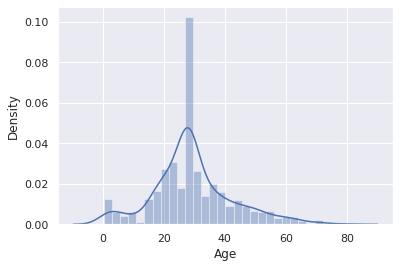

In [106]:
# Check the distribution of age of passengers
sns.set(color_codes=True)
sns.distplot(df.Age)

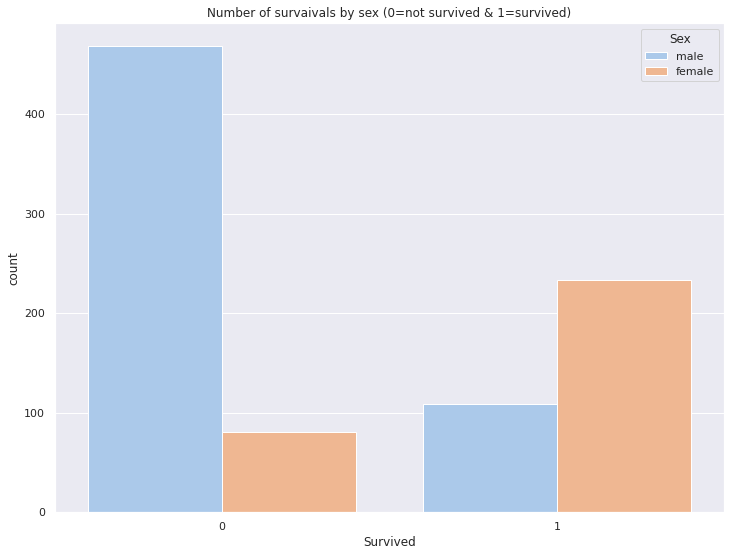

In [107]:
# Show the stacked bar diagram for survaivals based on sex 
plt.figure(figsize=(12,9))
sns.set_palette('pastel')
sns.countplot(x='Survived',hue='Sex',data=df)
plt.title('Number of survaivals by sex (0=not survived & 1=survived)')
plt.show()

In [108]:
# To check the number of survival by class
print(df['Pclass'].value_counts())

#survival by class
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()


3    491
1    216
2    184
Name: Pclass, dtype: int64


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


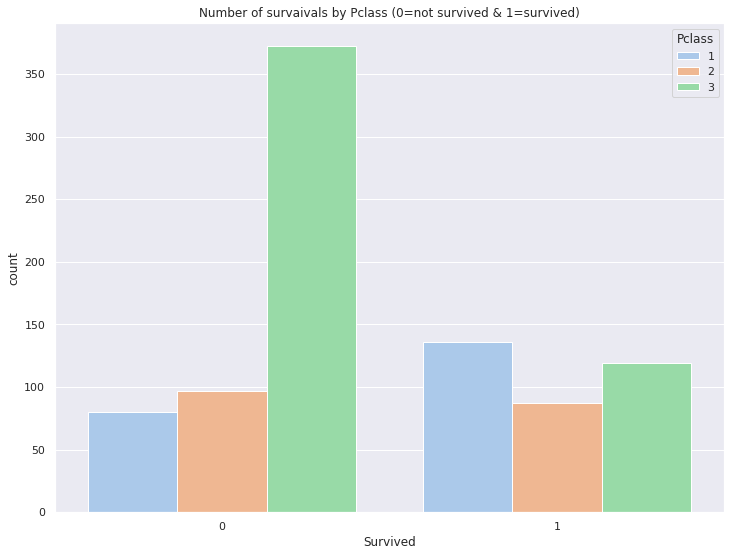

In [109]:
# Show the stacked bar diagram for survaivals based on Pclass
plt.figure(figsize=(12,9))
sns.set_palette('pastel')
sns.countplot(x='Survived',hue='Pclass',data=df)
plt.title('Number of survaivals by Pclass (0=not survived & 1=survived)')
plt.show()

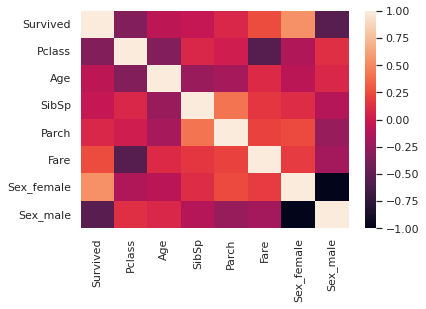

In [110]:
# Check the correlations between the features by heatmap
df_heat_map=df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]
df_heat_map=pd.get_dummies(df_heat_map, columns=['Sex'])
ax = sns.heatmap(df_heat_map.corr())


# **Fitting the Models**

## Preparing the dataset

In [111]:
# Removing some of the  columns "Passenger Id, Ticket and name
df1 = df.drop(["PassengerId","Ticket","Name"], axis=1)#from now on we work with df1

# Creating dummy variables for features "Sex", "Cabin" and "Embarked" 
df1 = pd.get_dummies(df1, columns=["Sex", "Cabin", "Embarked"])
df1.head(8)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_NotSet,Cabin_T,Embarked_C,Embarked_NotMentioned,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
5,0,3,28.0,0,0,8.4583,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
6,0,1,54.0,0,0,51.8625,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,3,2.0,3,1,21.0750,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [112]:
# Split the train dataset into training and validation
# Response variable is Survived
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df1.drop(["Survived"], axis=1),
                                                df1["Survived"], test_size=0.30)

##Random Forest

In [113]:
# Fit the Random forest model
random_forest_model = RandomForestClassifier(criterion='gini',
                                            n_estimators=1750,
                                            max_depth=7,
                                            min_samples_split=6,
                                            min_samples_leaf=6,
                                            max_features='auto',
                                            verbose=1,
                                            random_state = 3)

random_forest_model.fit(Xtrain, Ytrain)
Ypred = random_forest_model.predict(Xtest)
random_forest_model_acc = accuracy_score(Ypred, Ytest) * 100
print("Accuracy:", random_forest_model_acc)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1750 out of 1750 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 76.86567164179104


[Parallel(n_jobs=1)]: Done 1750 out of 1750 | elapsed:    0.2s finished


## K Nearest Neighbor Model(KNN)

In [114]:
# KNN model
k_range = range(1,26)
scores=[]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtrain, Ytrain)
    Ypred = knn.predict(Xtest)
    scores.append(metrics.accuracy_score(Ytest,Ypred))
print(scores)

[0.7126865671641791, 0.6940298507462687, 0.6865671641791045, 0.6902985074626866, 0.6753731343283582, 0.6753731343283582, 0.6604477611940298, 0.664179104477612, 0.6753731343283582, 0.6716417910447762, 0.6753731343283582, 0.7052238805970149, 0.6902985074626866, 0.7052238805970149, 0.6902985074626866, 0.6902985074626866, 0.6940298507462687, 0.7164179104477612, 0.7014925373134329, 0.7126865671641791, 0.6828358208955224, 0.7126865671641791, 0.6753731343283582, 0.6902985074626866, 0.664179104477612]


Text(0, 0.5, 'Testing Accuracy')

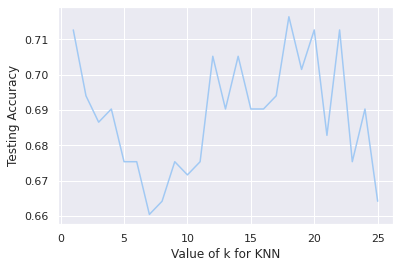

In [120]:
# display the best k for knn model
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')

In [123]:
# K= 18 has the highest accuracy rate.

knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(Xtrain, Ytrain)
Ypred = knn.predict(Xtest)
print(metrics.accuracy_score(Ytest,Ypred))

0.7164179104477612


## Decison Tree


In [124]:
decisiontree = DecisionTreeClassifier()
# Define the function 
def plot_tree(decisiontree, features_names=None, class_names=None):
    """Returns a  decision tree
    
    Inputs
        - decisiontree: tree to visualize
        - feature_names: iterable with the names of the features present in the data.
        - class_names: iterable with the names of the classes present in the data, in increasing order.
        
    """
    dot_data = tree.export_graphviz(
        decisiontree, 
        out_file=None, 
        filled=True, 
        rounded=True, 
        rotate=True,
        feature_names=features_names,
        class_names=class_names
    )
    return Source(dot_data)



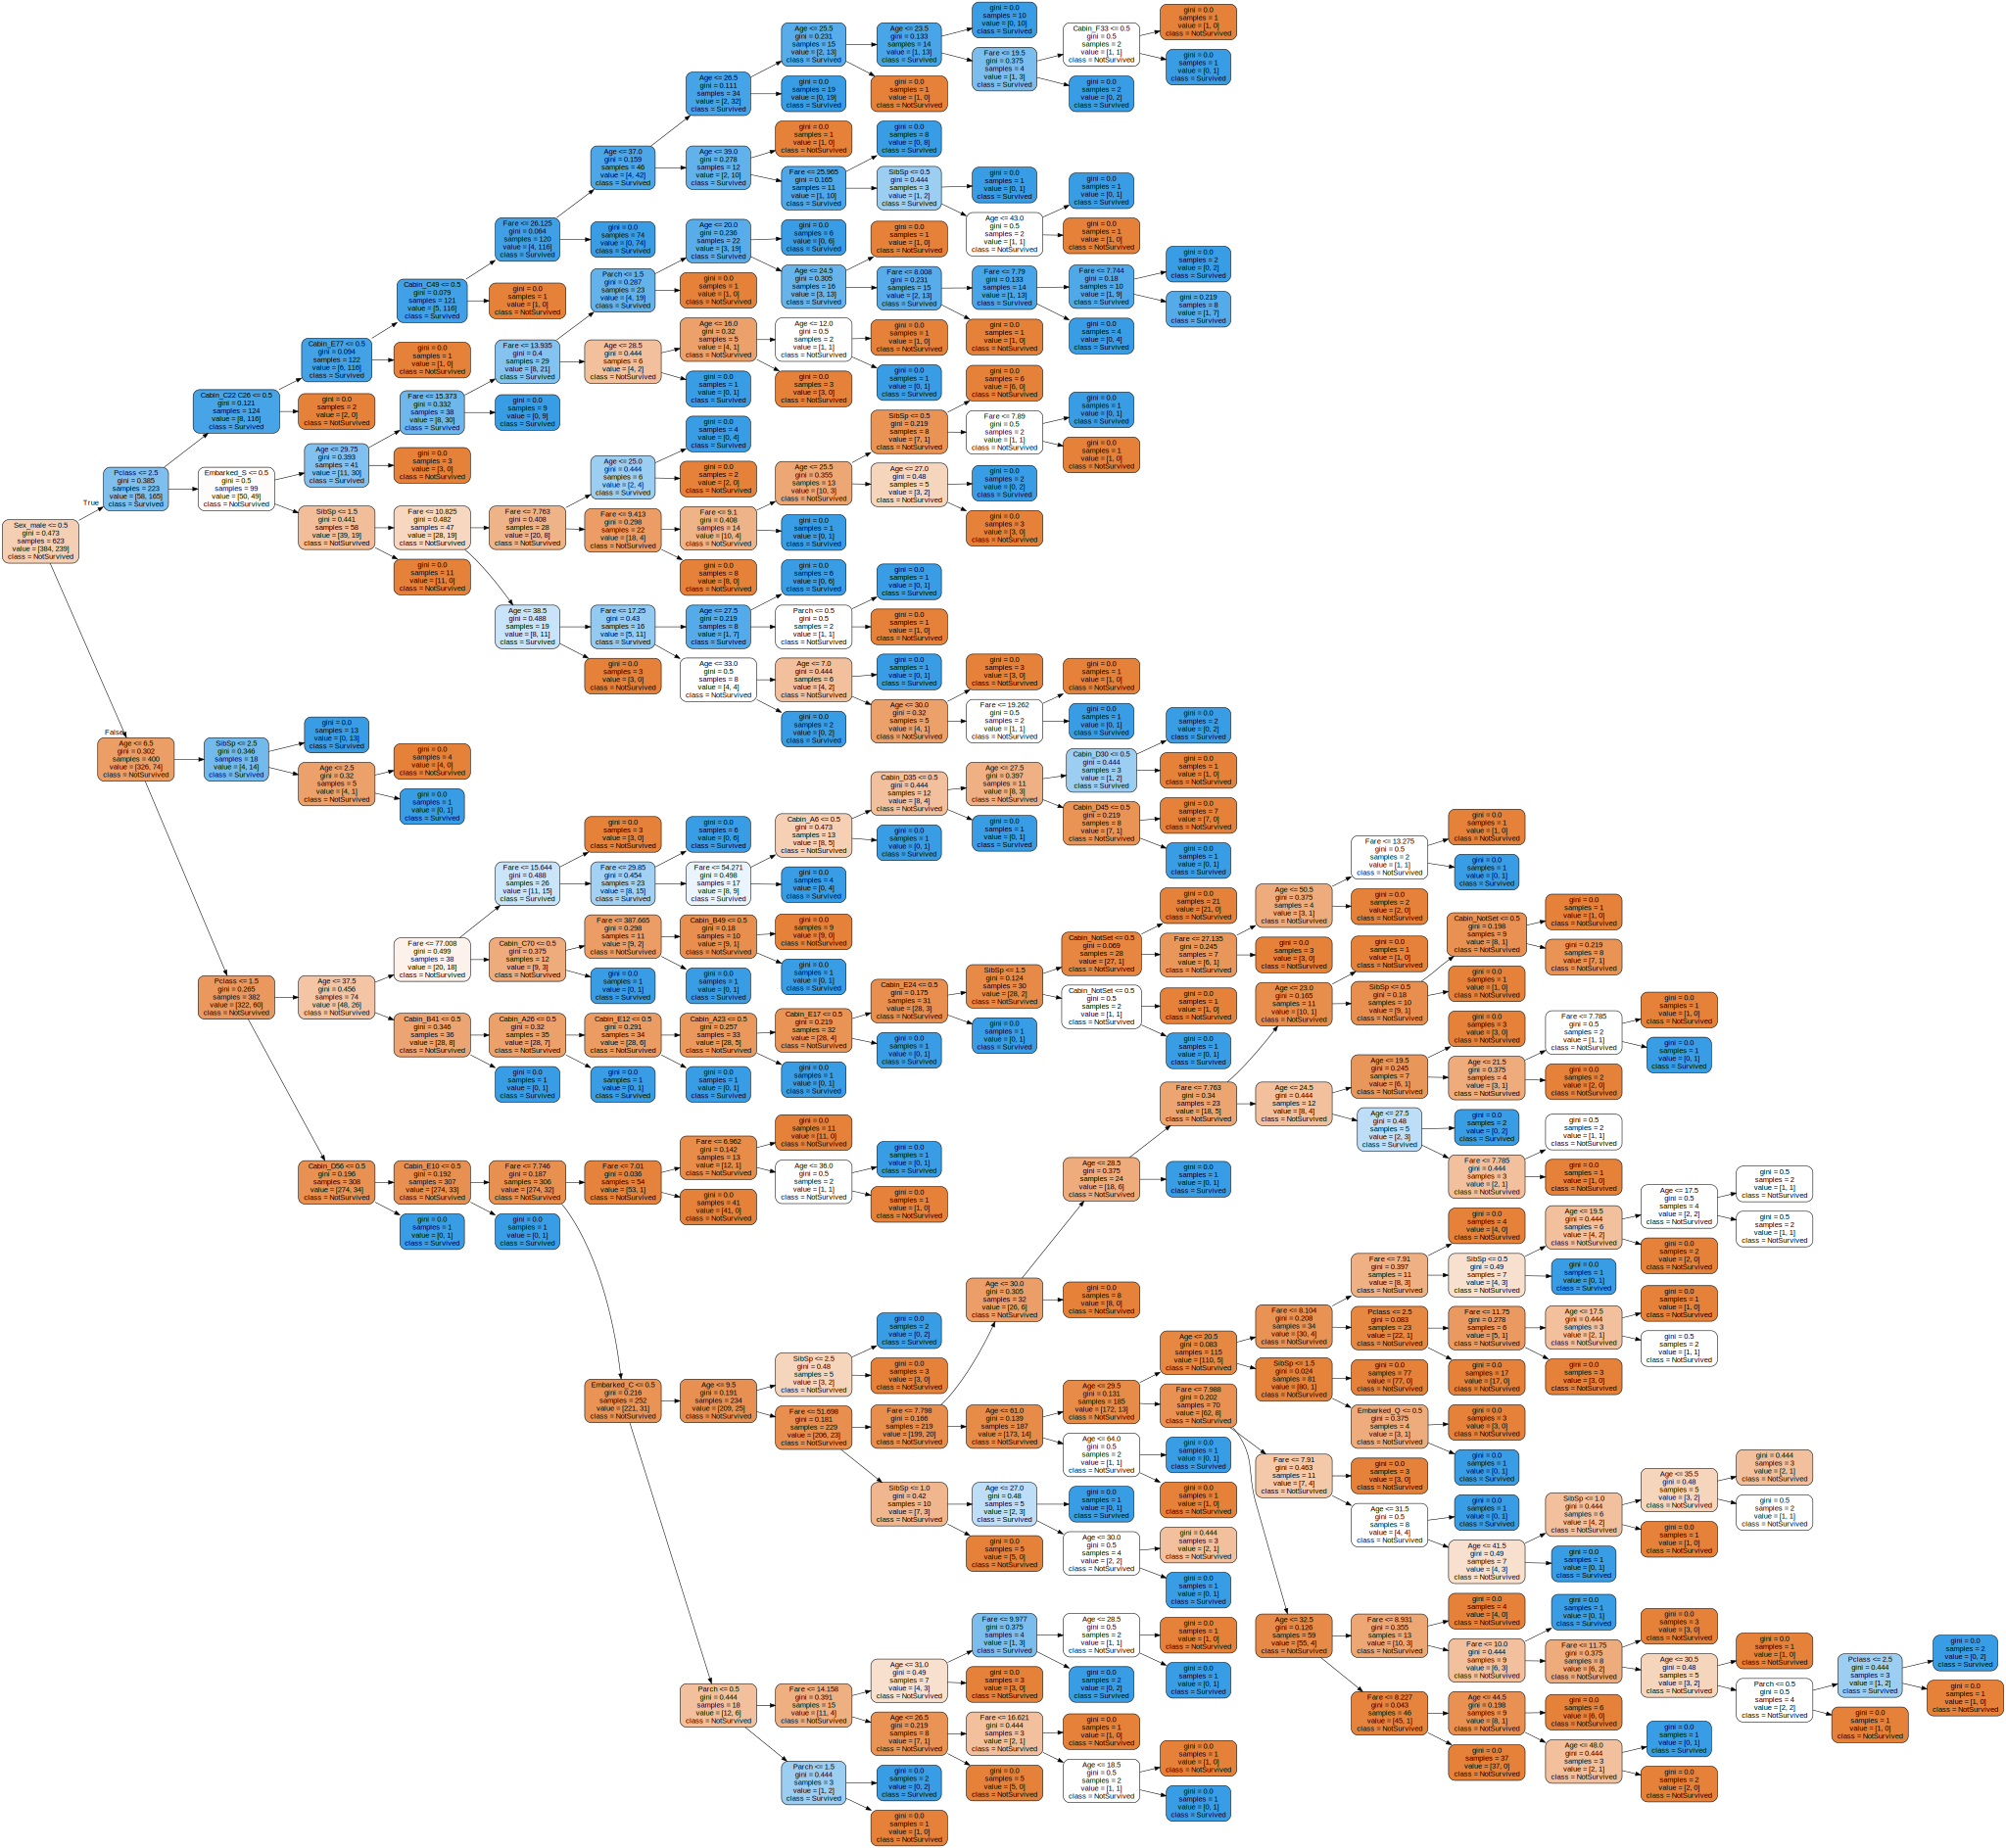

In [125]:
# Decision tree
decisiontree = DecisionTreeClassifier()
decisiontree.fit(Xtrain, Ytrain)
plot_tree(decisiontree, features_names=Xtrain.columns, class_names=["NotSurvived", "Survived"])

In [126]:
# Getting the Accuracy of the decision tree
Ypred = decisiontree.predict(Xtest)
decision_tree_model_acc = accuracy_score(Ypred, Ytest) * 100
print("Accuracy:", decision_tree_model_acc)


Accuracy: 78.35820895522389
